In [1]:
%matplotlib inline
import seaborn as sns; sns.set()

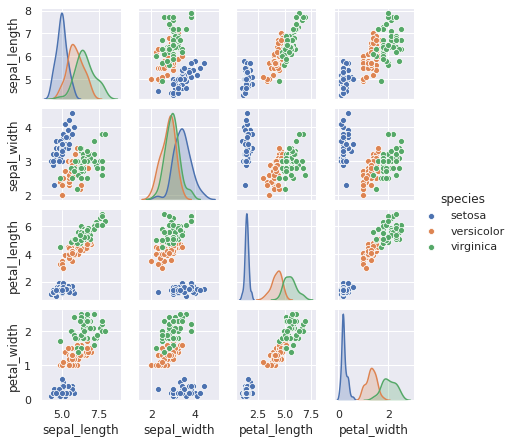

In [2]:
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species', height=1.5);

In [3]:
X_iris = iris.drop('species', axis=1)
X_iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y_iris = iris['species']
y_iris

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

# Unsupervised learning example: Iris dimensionality

In [5]:
from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2) # 2. Instantiate the model with hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris) # 4. Transform the data to two dimensions

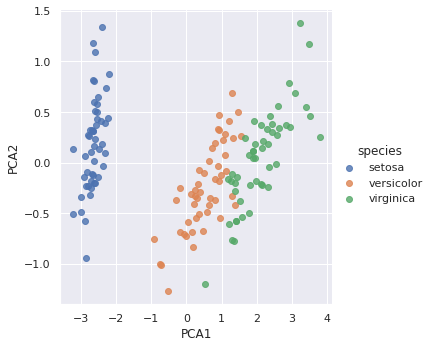

In [6]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

# Unsupervised learning: Iris clustering

In [7]:
from sklearn.mixture import GaussianMixture # 1. Choose the model class
model = GaussianMixture(n_components=3, covariance_type='full') # 2. Instantiate the model w/ hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris) # 4. Determine cluster labels

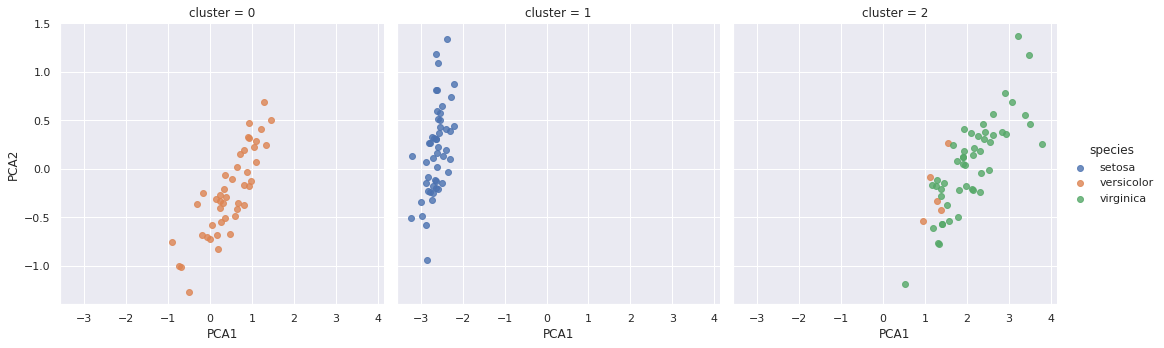

In [8]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

In [9]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3) # 2. Instantiate the model w/ hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris) # 4. Determine cluster labels

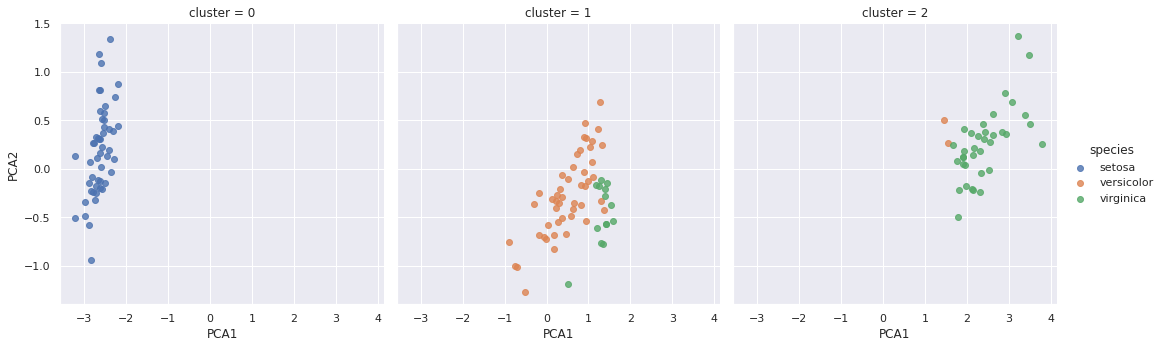

In [10]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

1.0

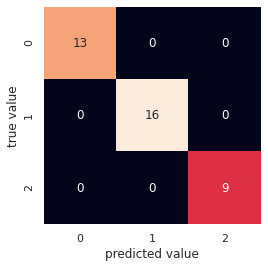

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');